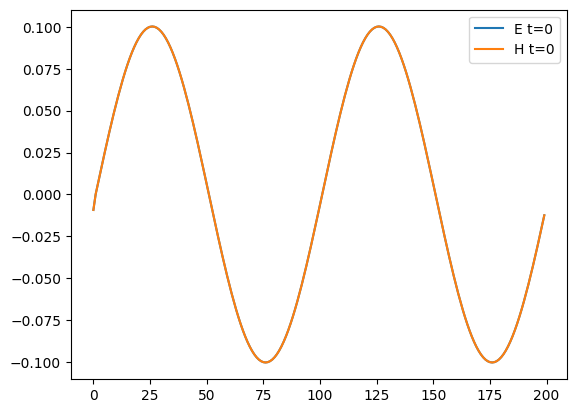

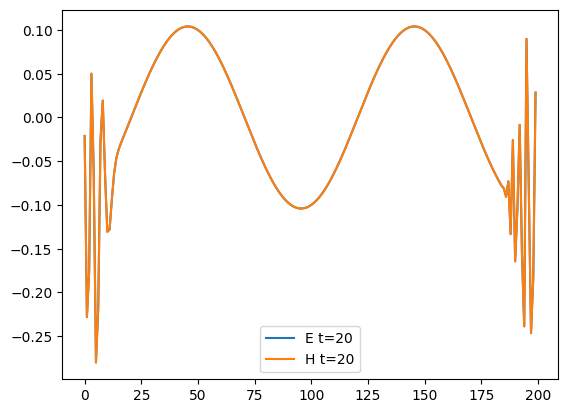

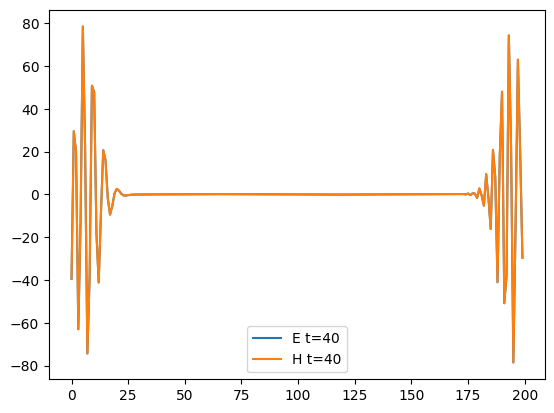

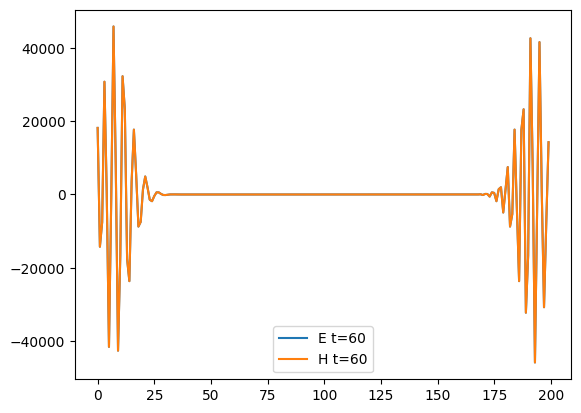

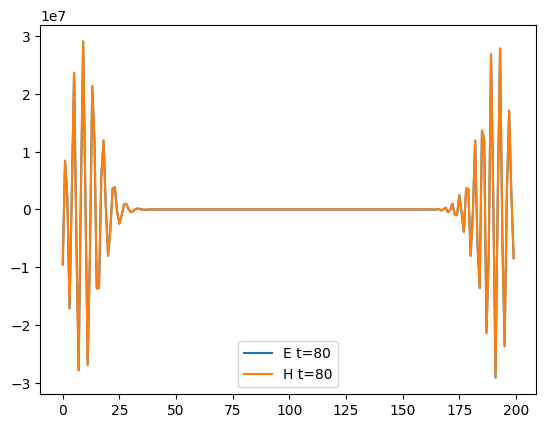

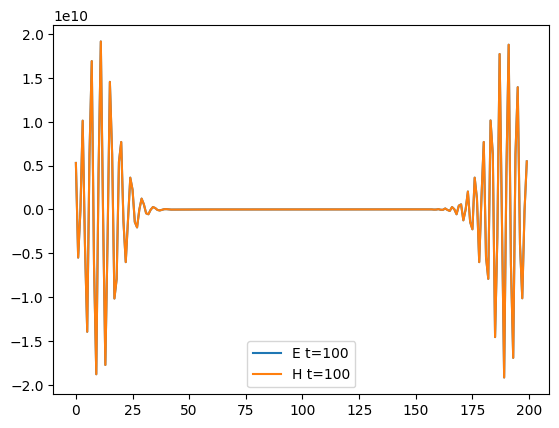

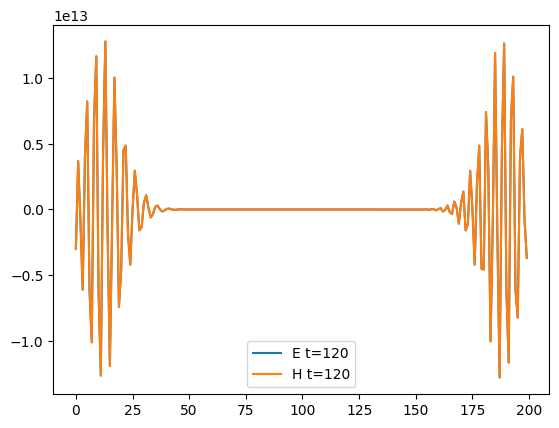

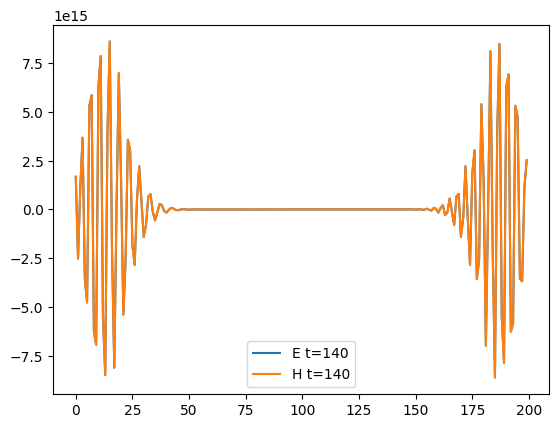

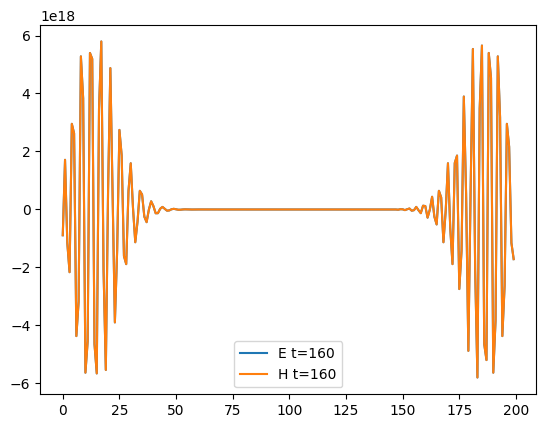

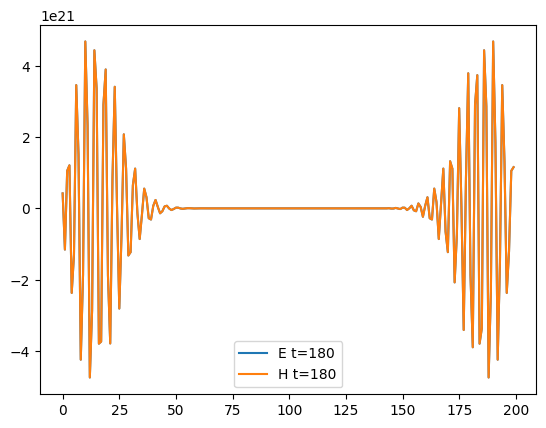

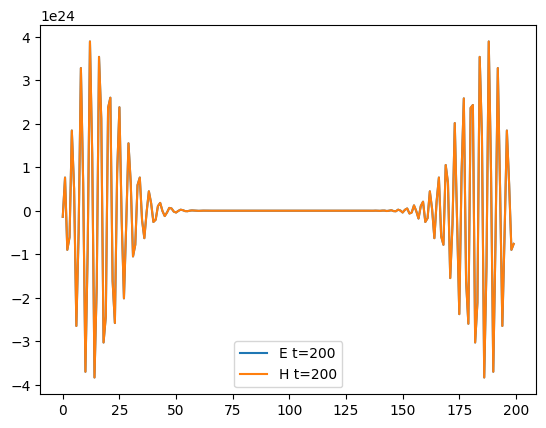

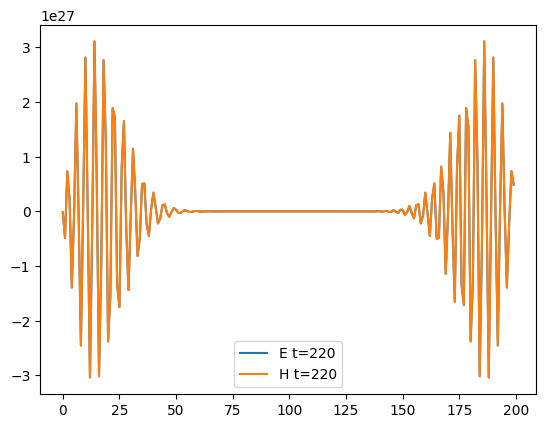

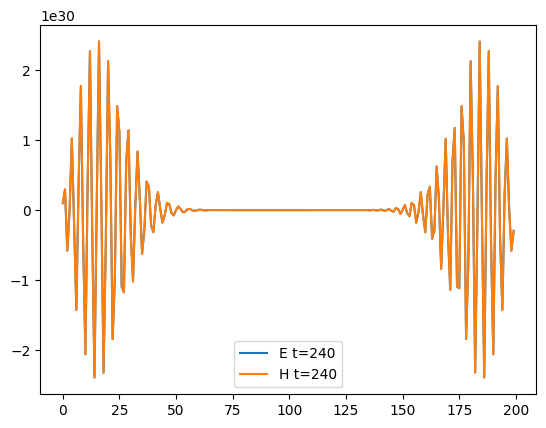

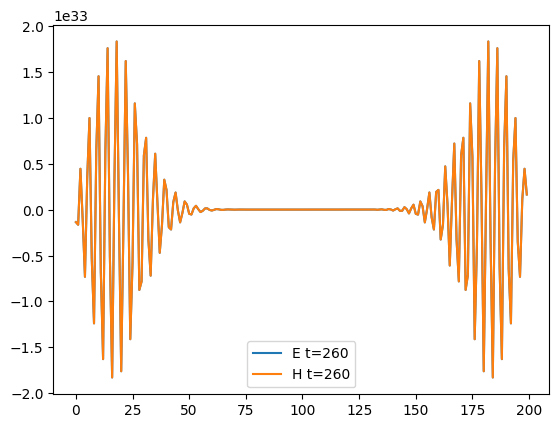

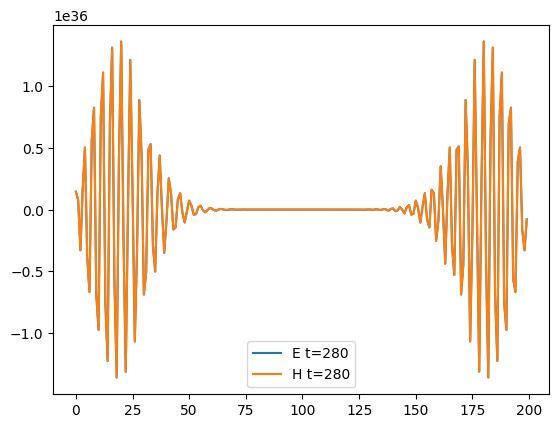

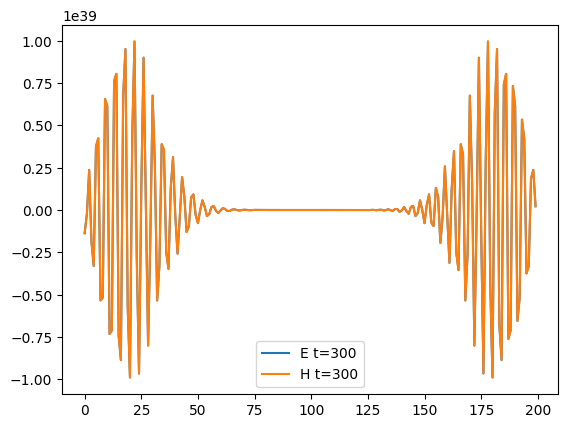

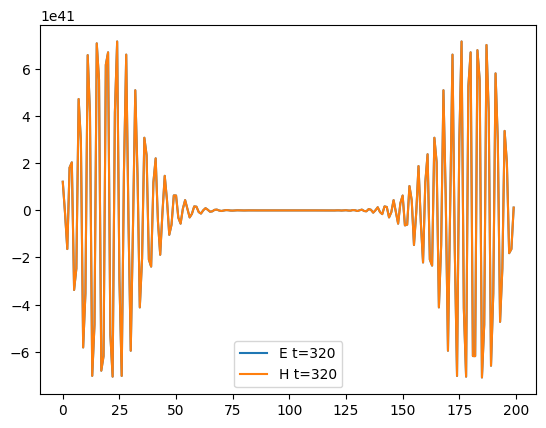

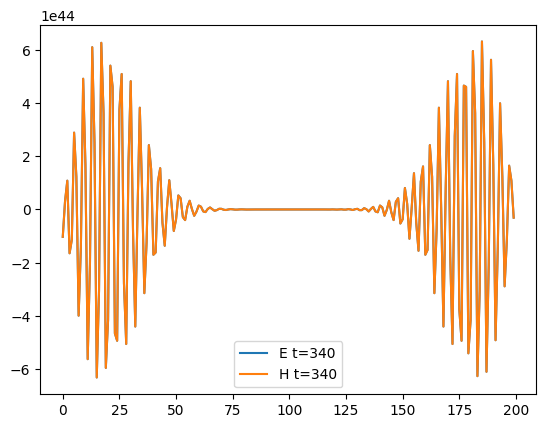

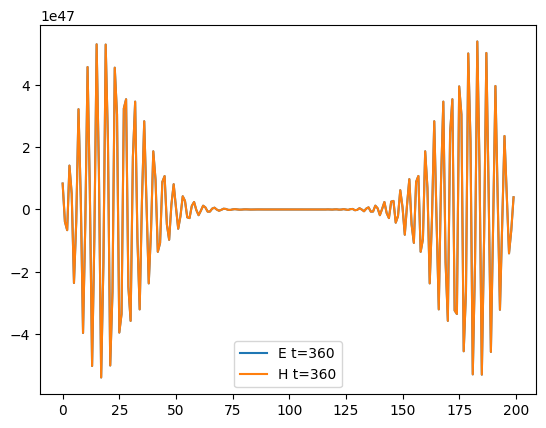

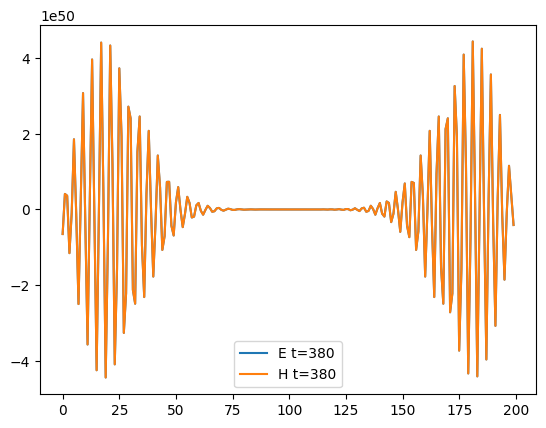

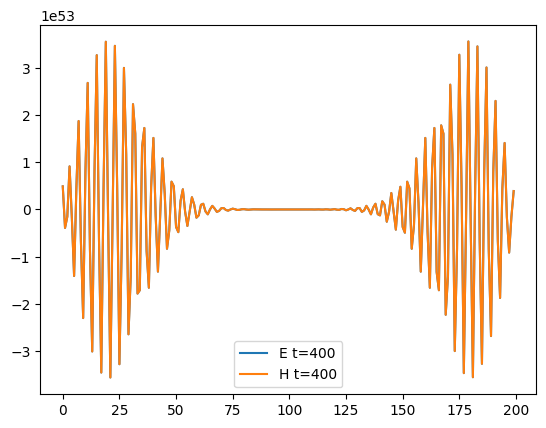

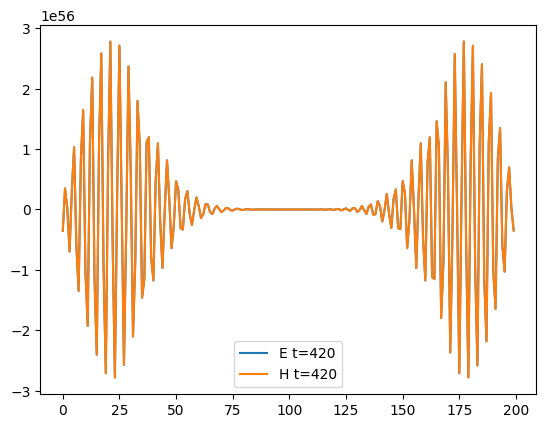

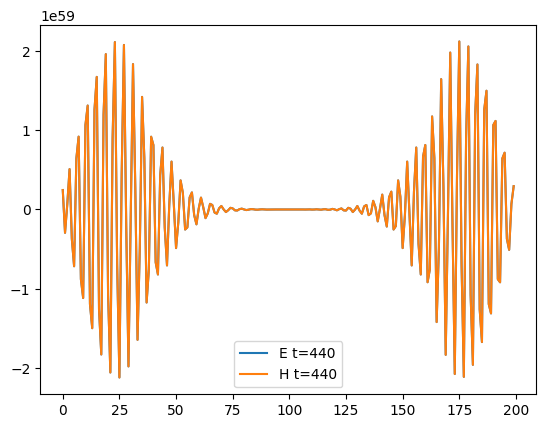

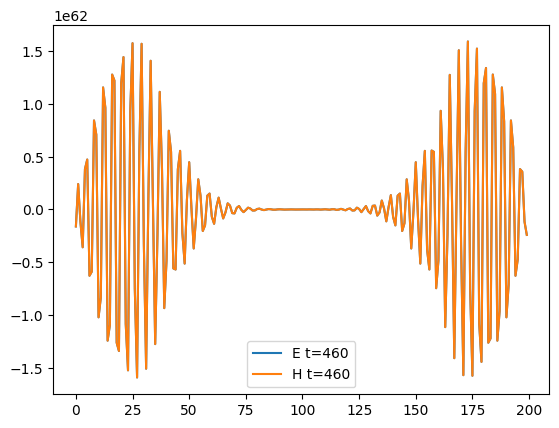

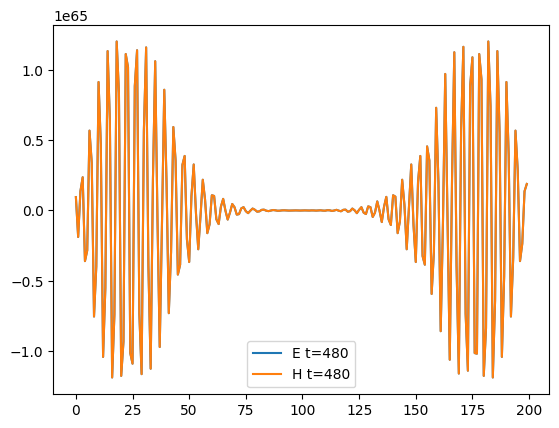

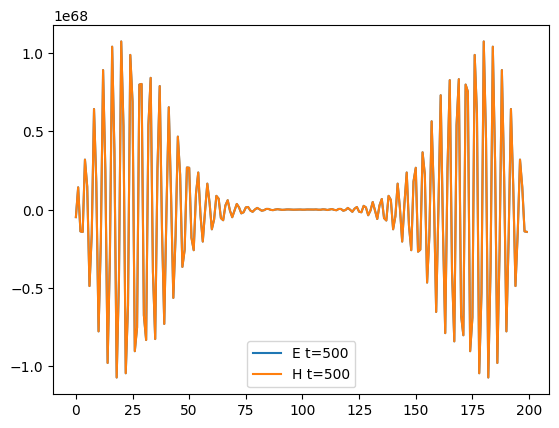

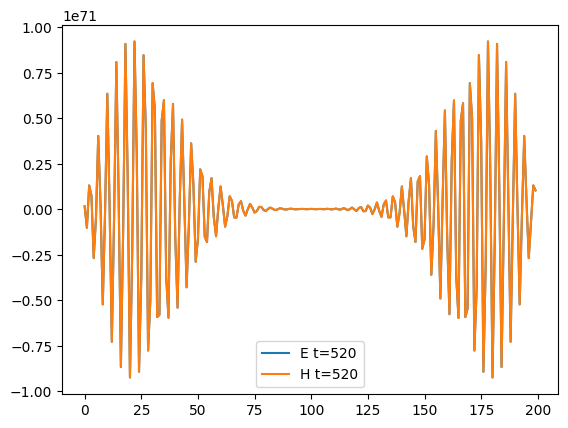

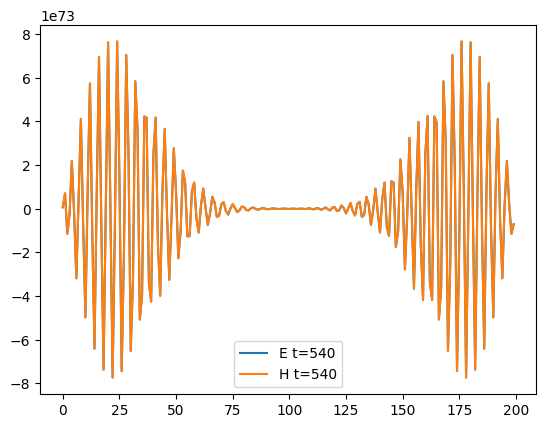

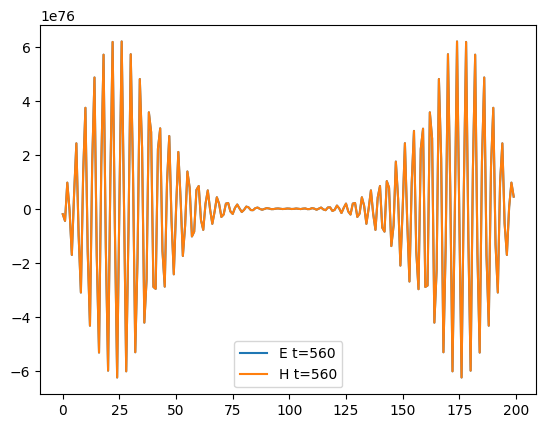

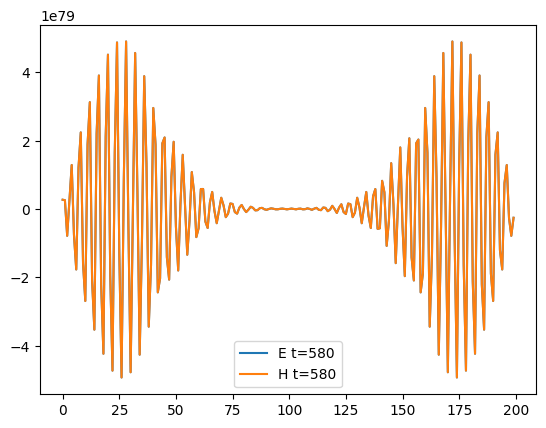

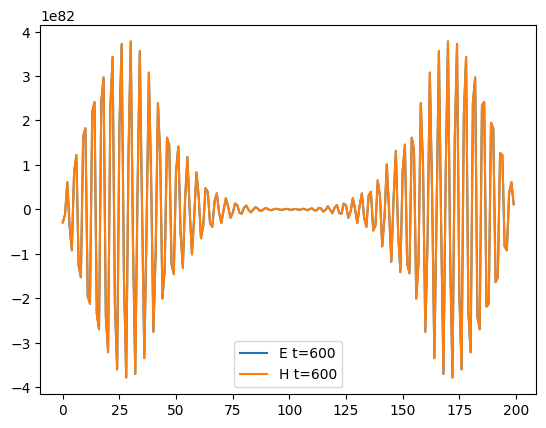

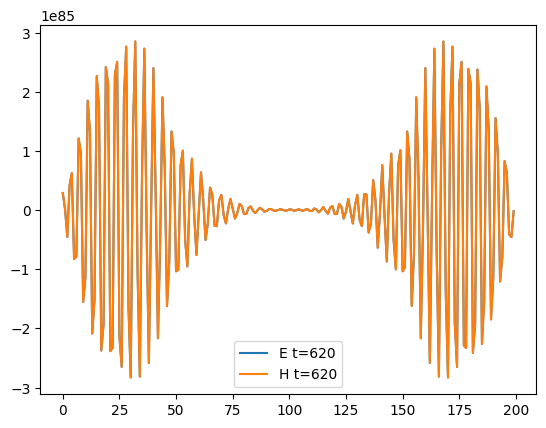

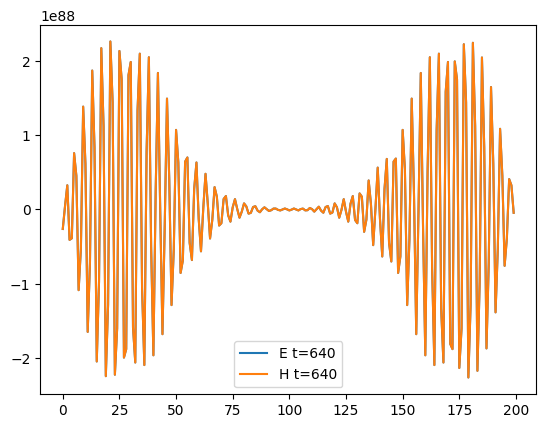

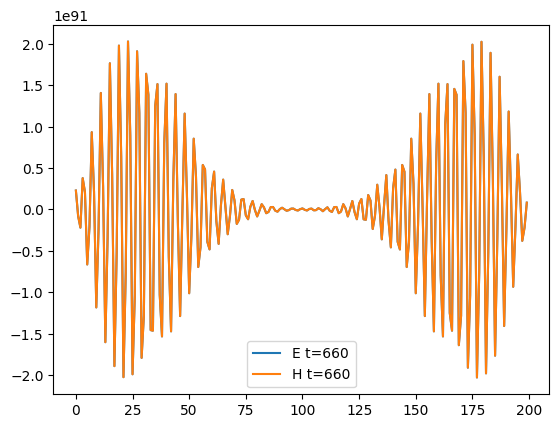

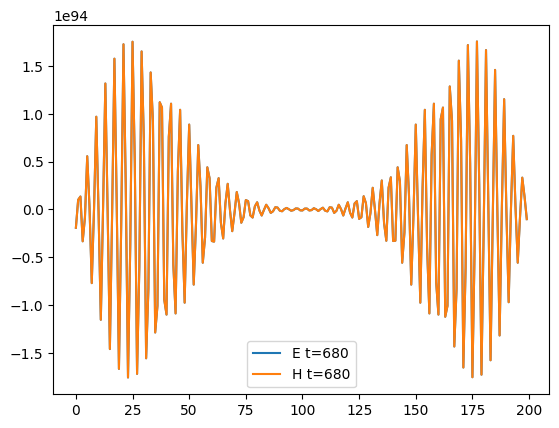

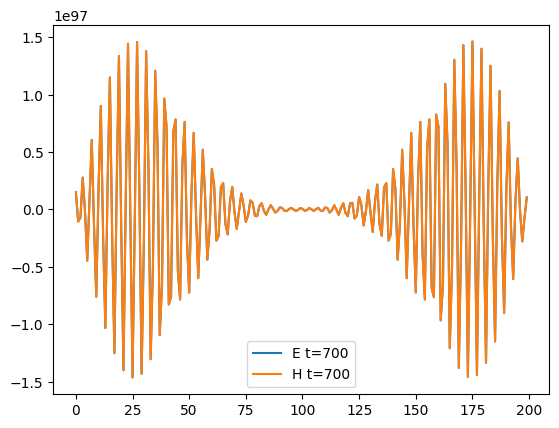

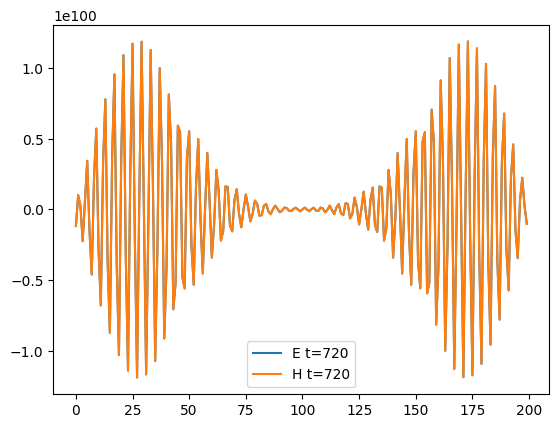

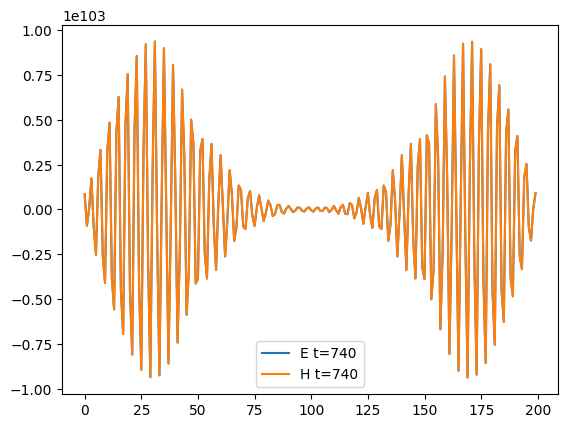

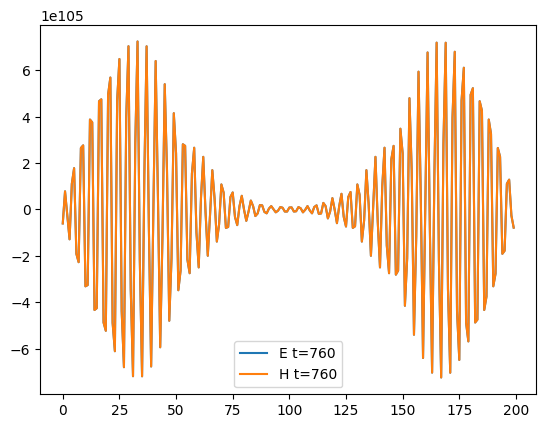

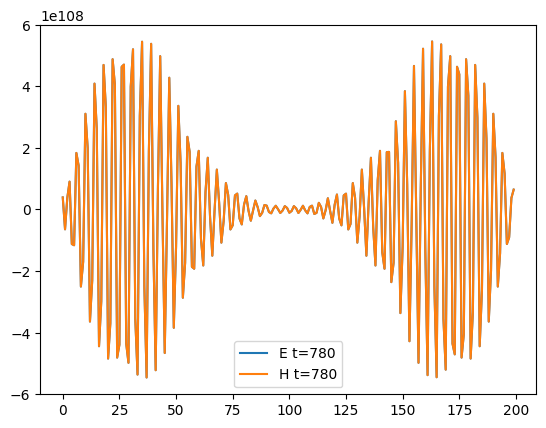

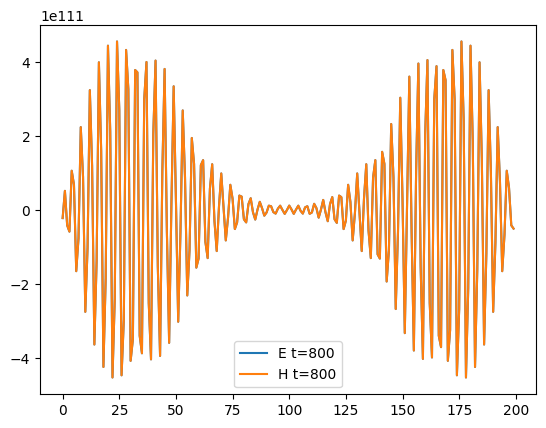

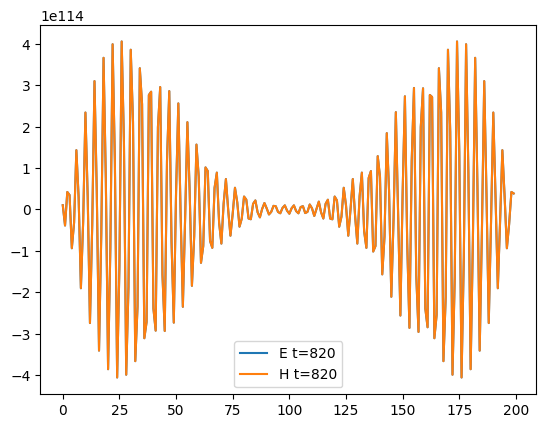

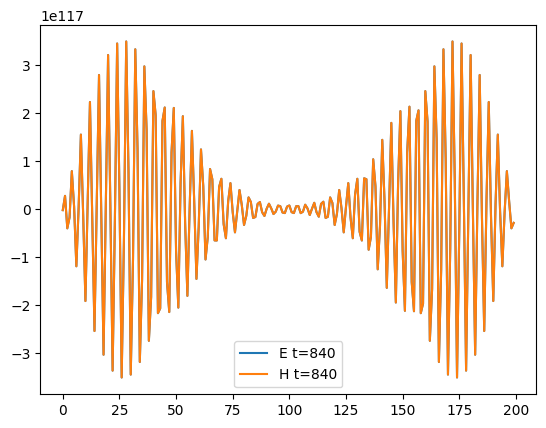

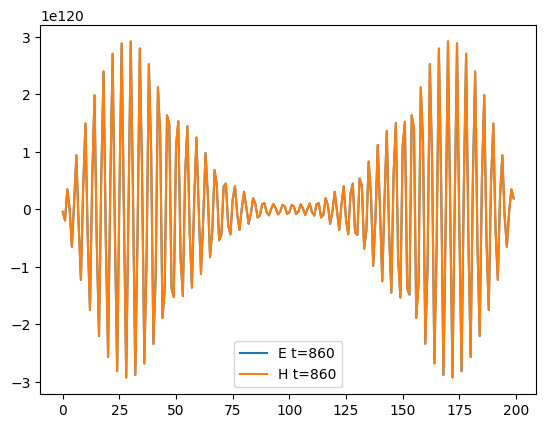

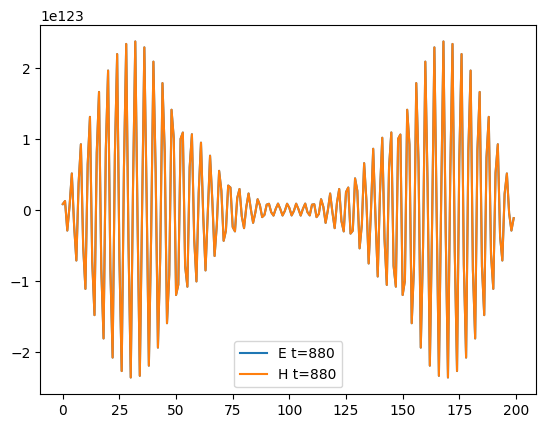

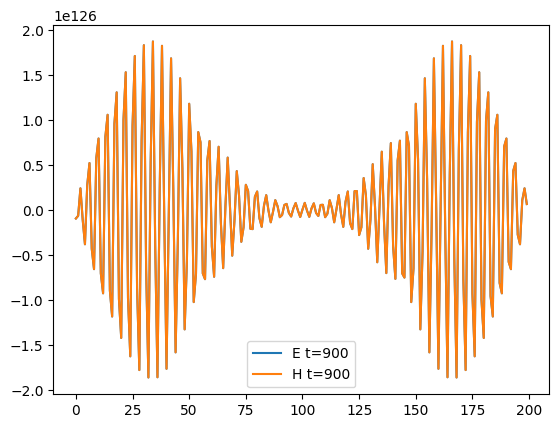

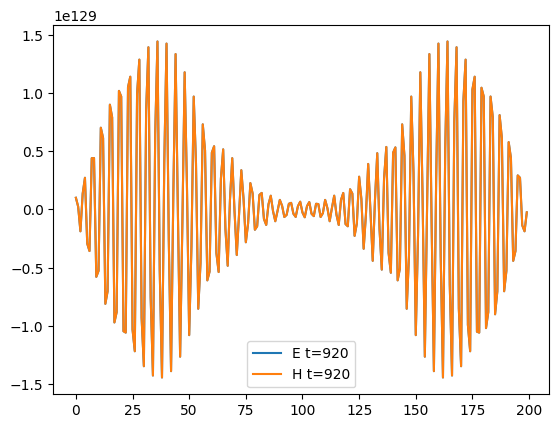

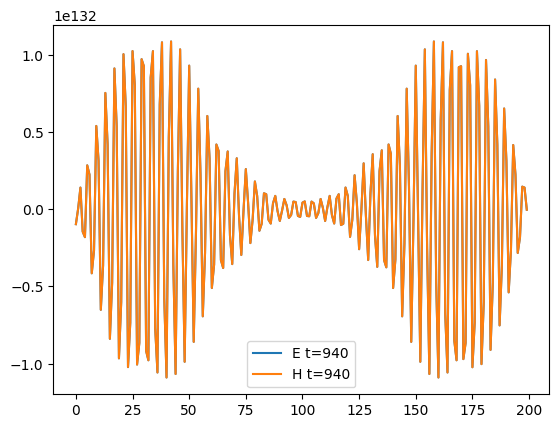

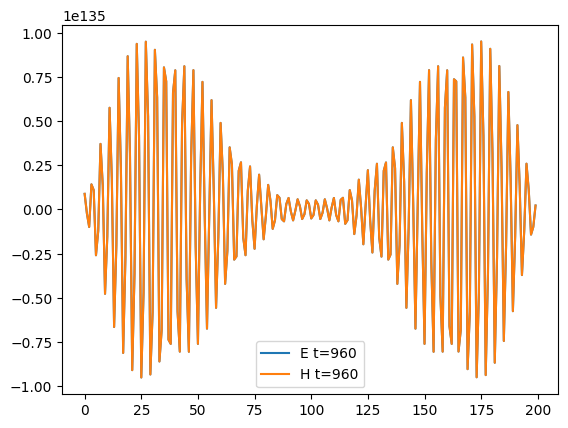

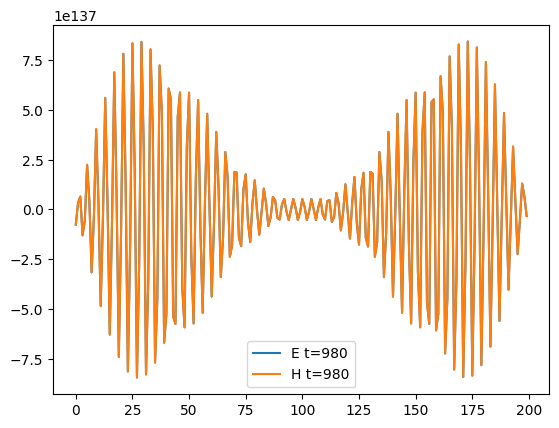

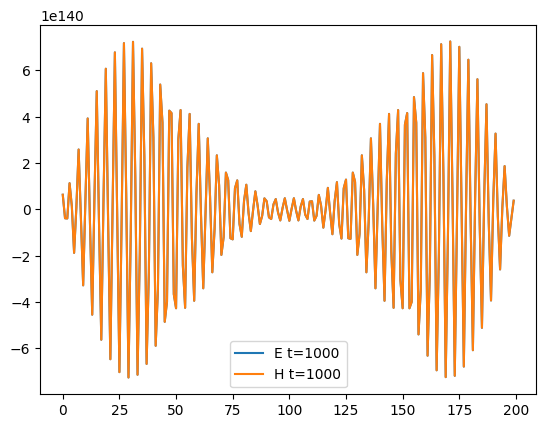

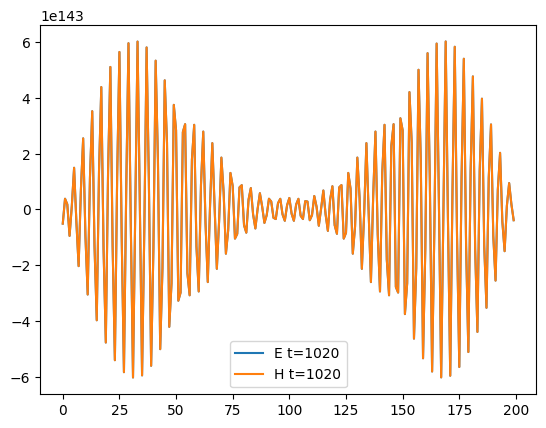

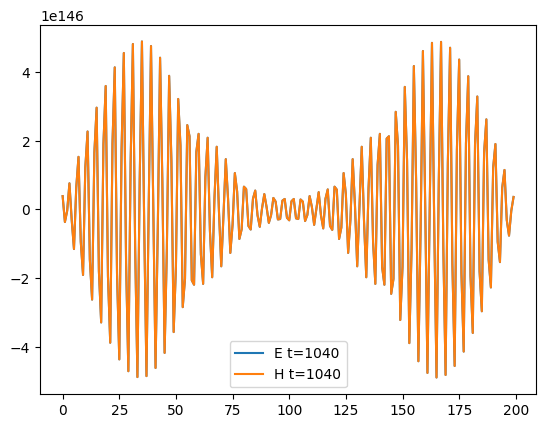

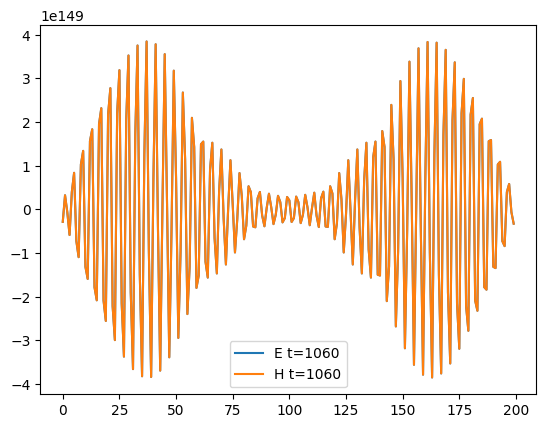

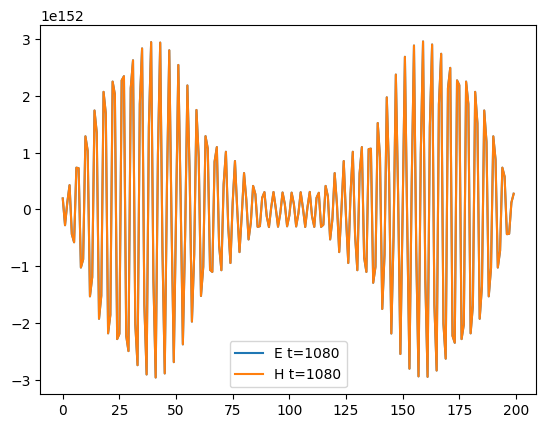

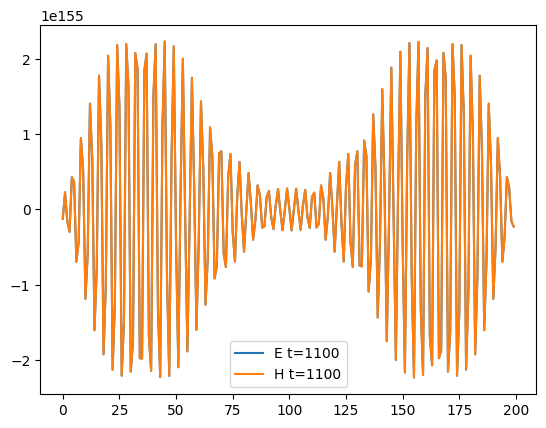

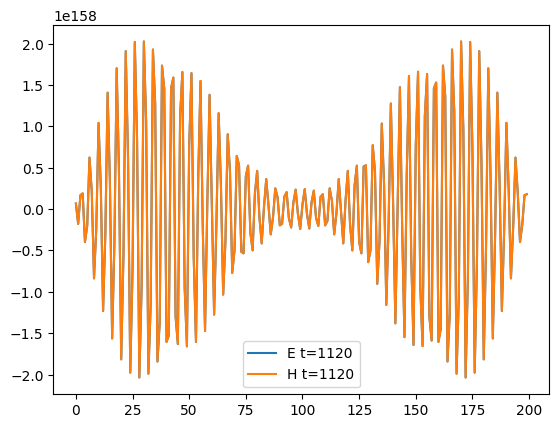

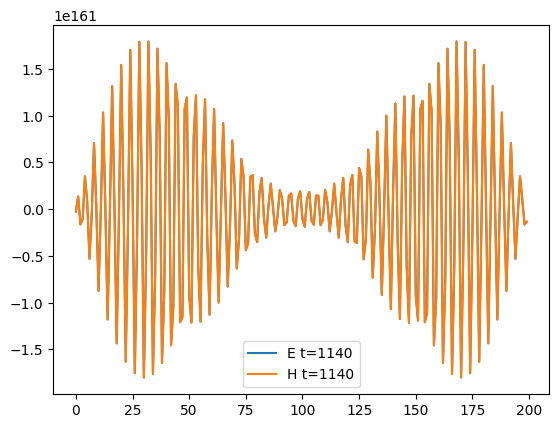

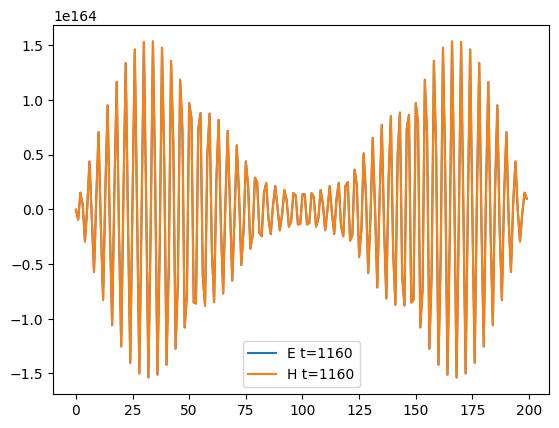

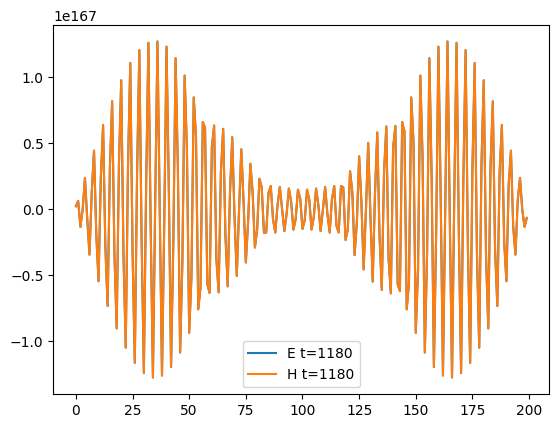

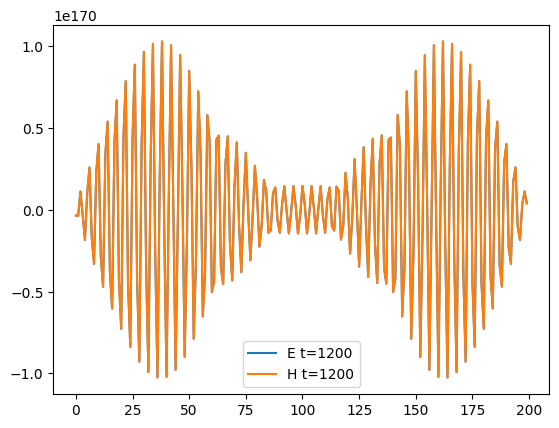

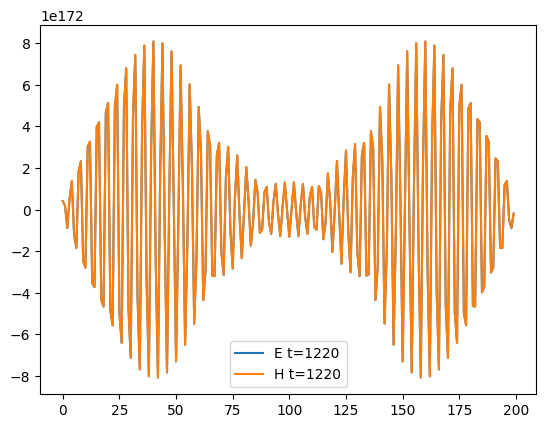

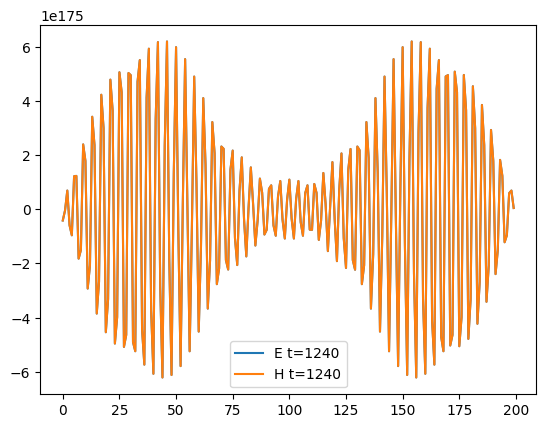

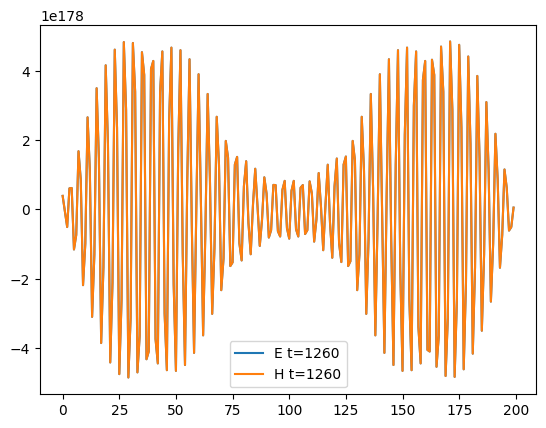

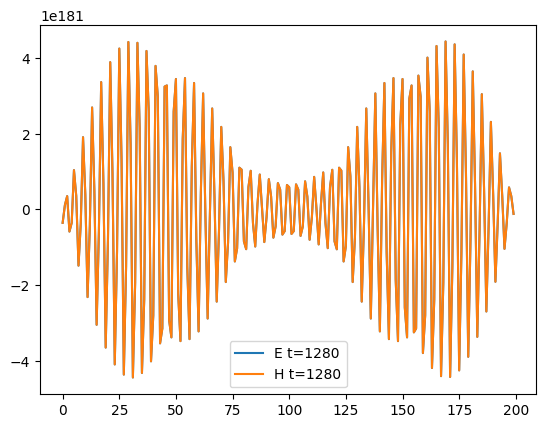

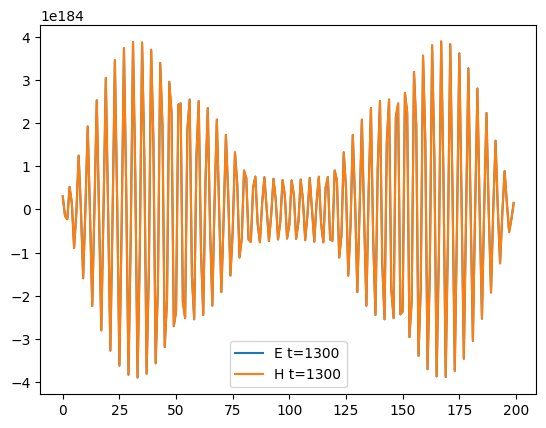

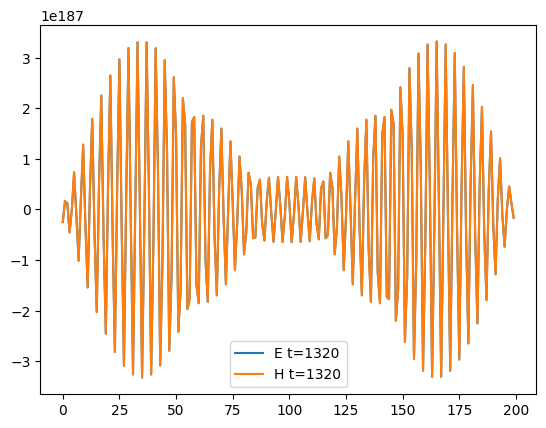

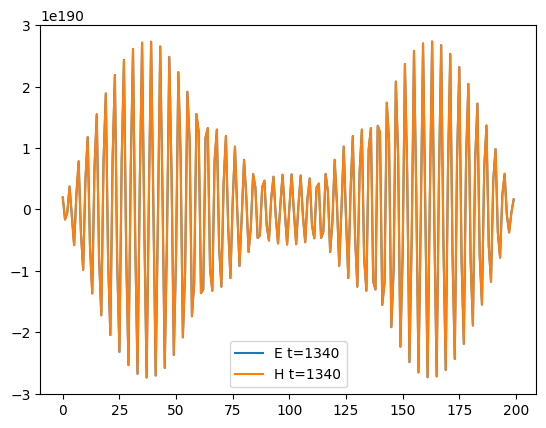

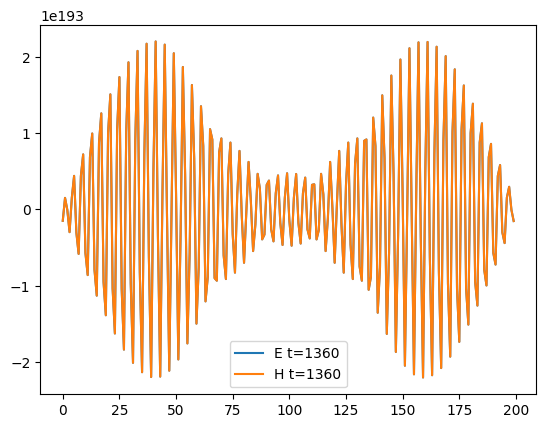

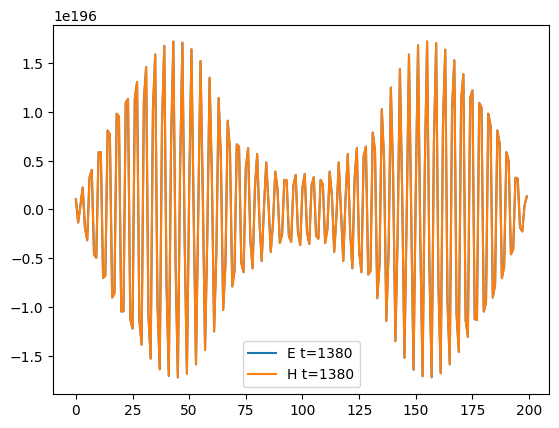

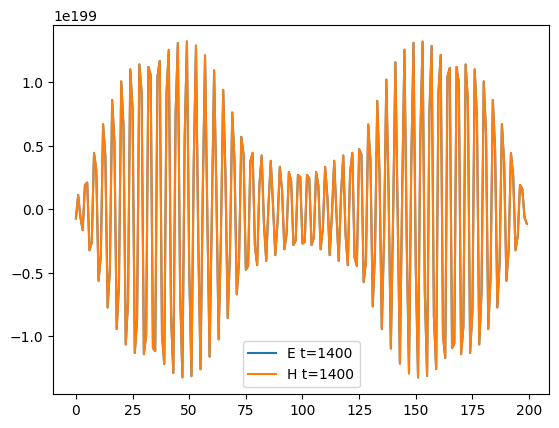

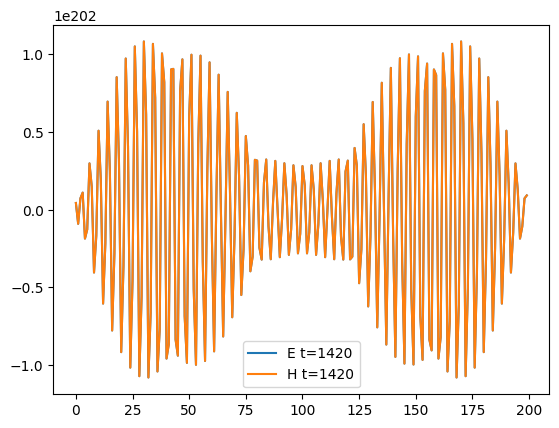

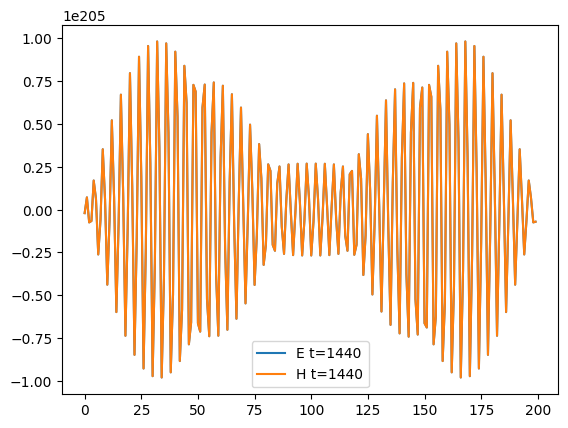

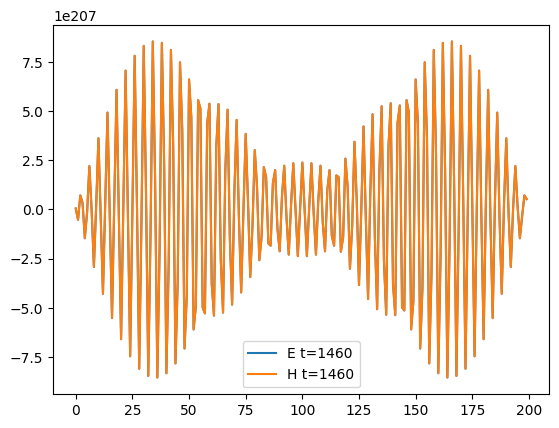

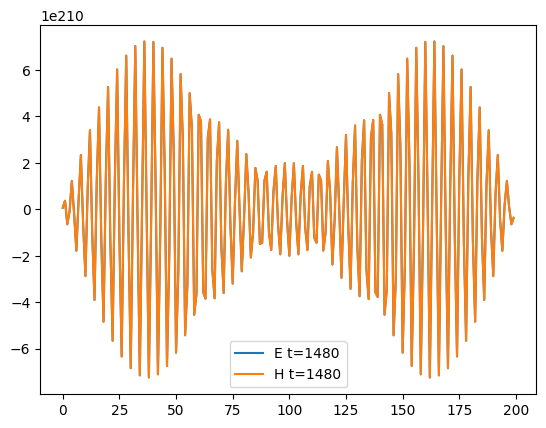

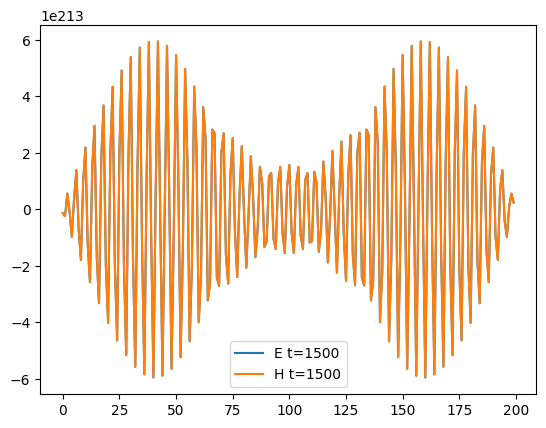

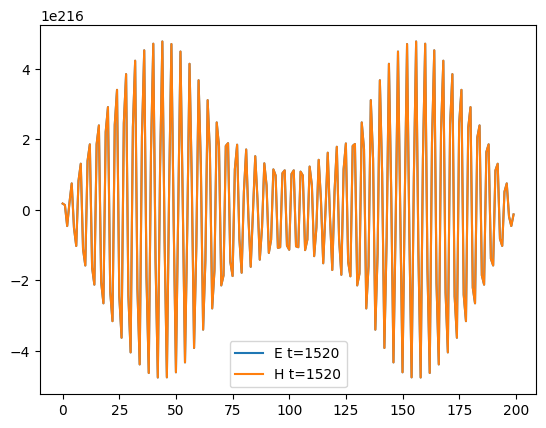

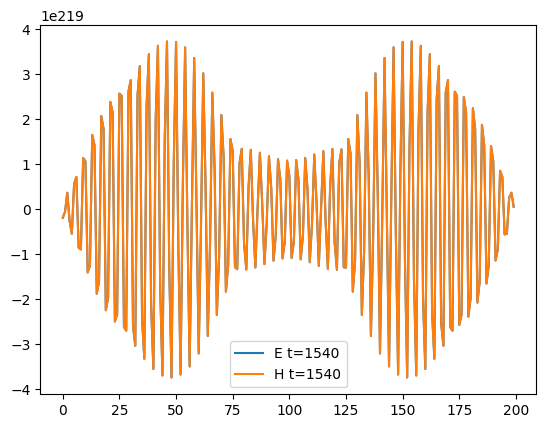

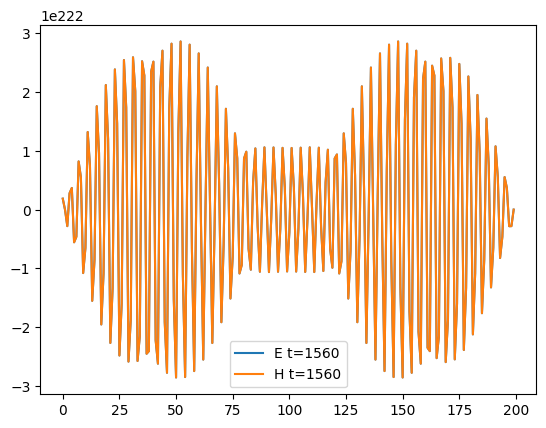

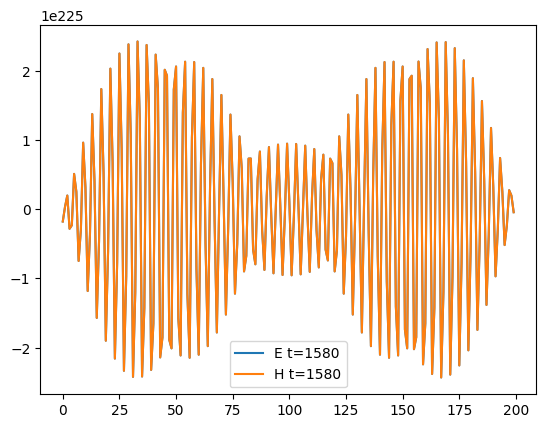

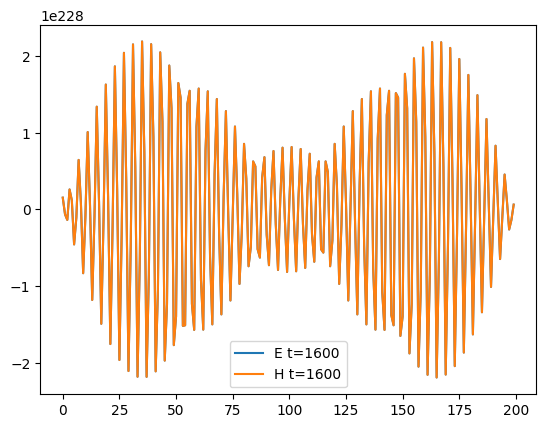

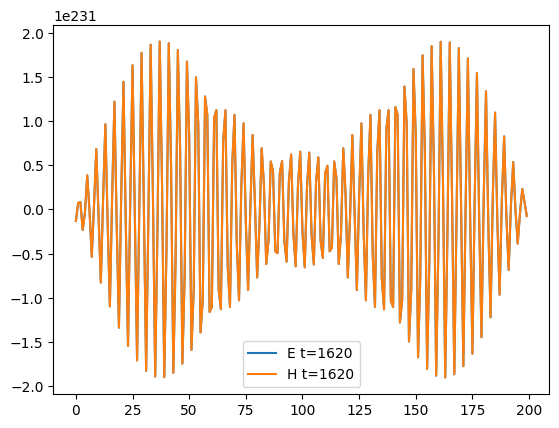

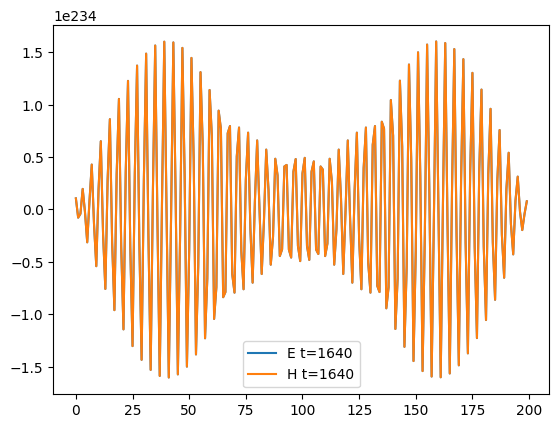

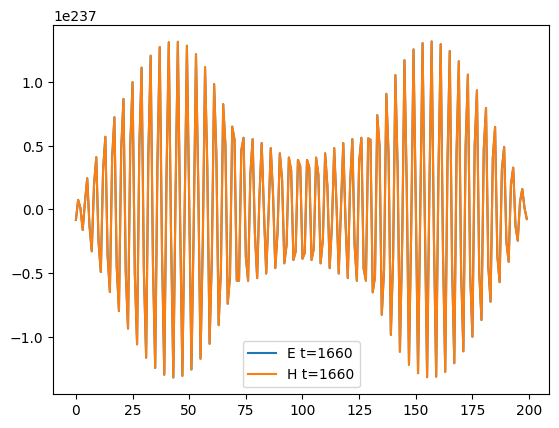

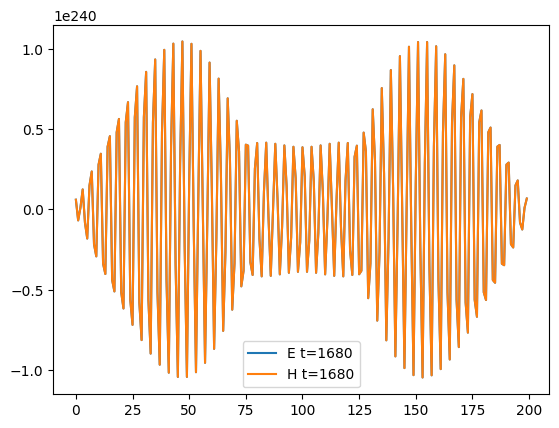

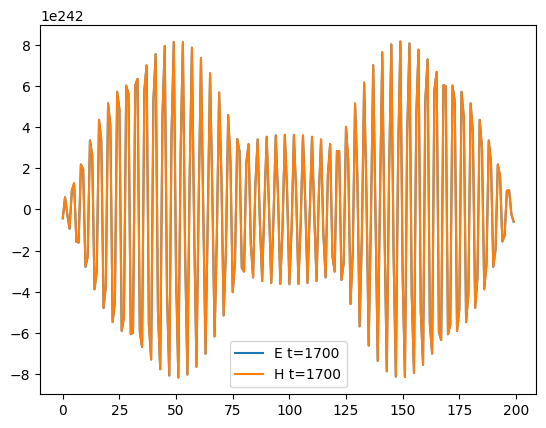

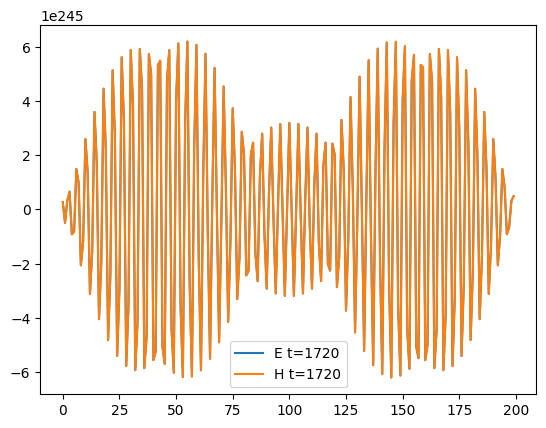

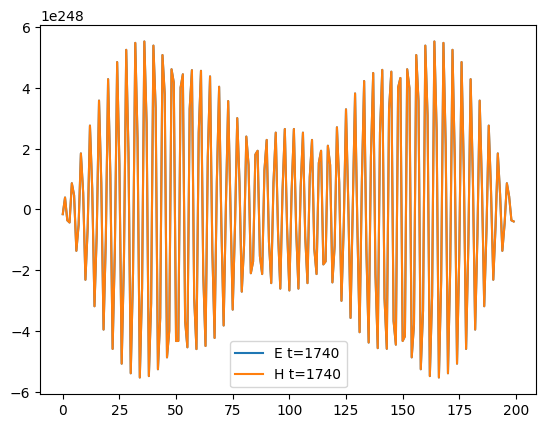

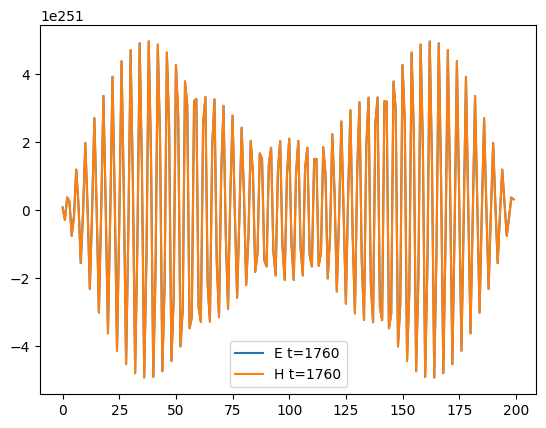

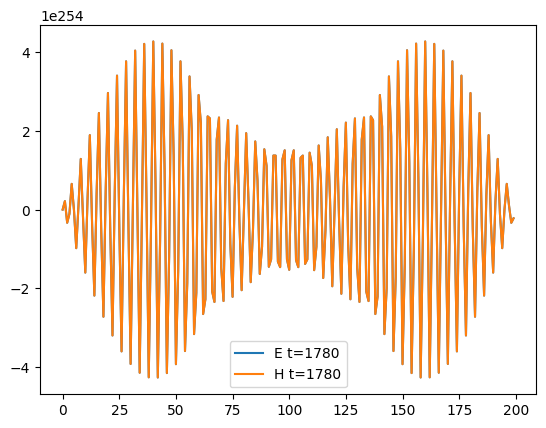

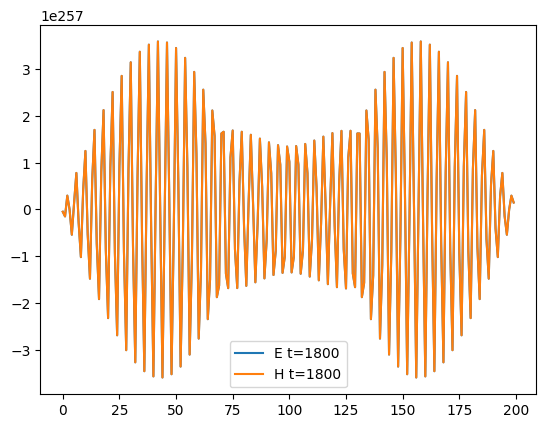

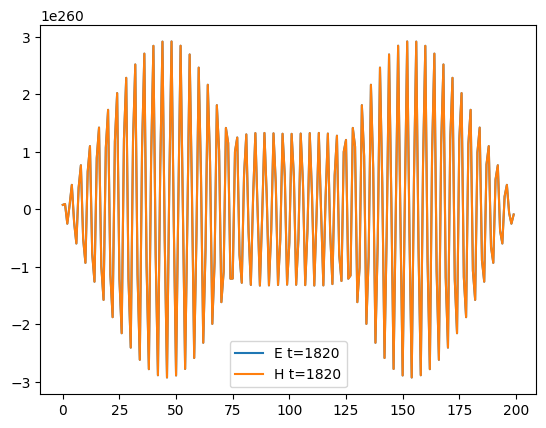

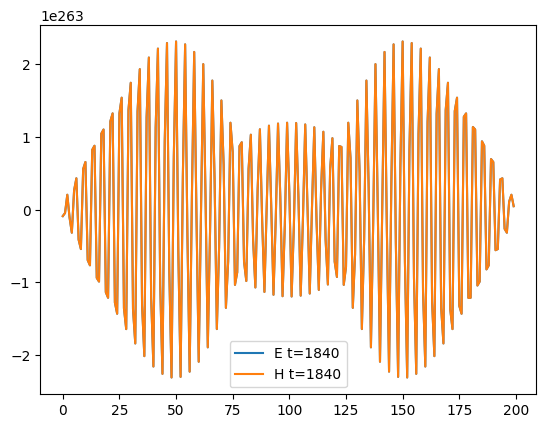

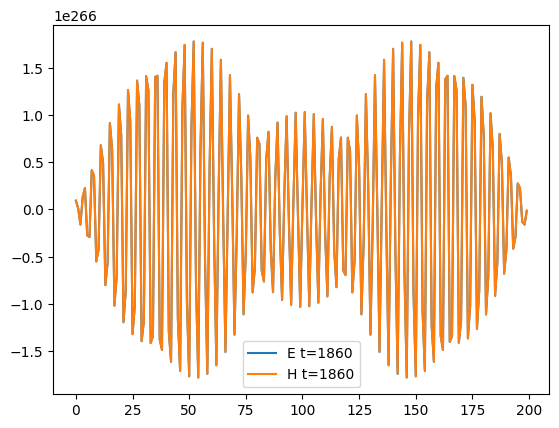

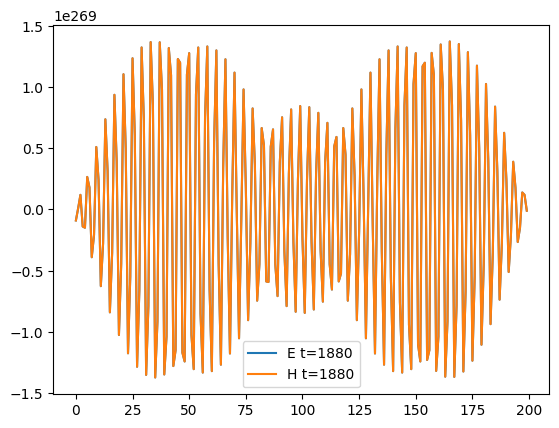

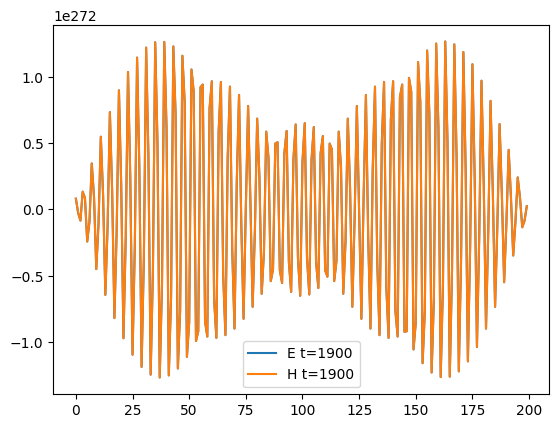

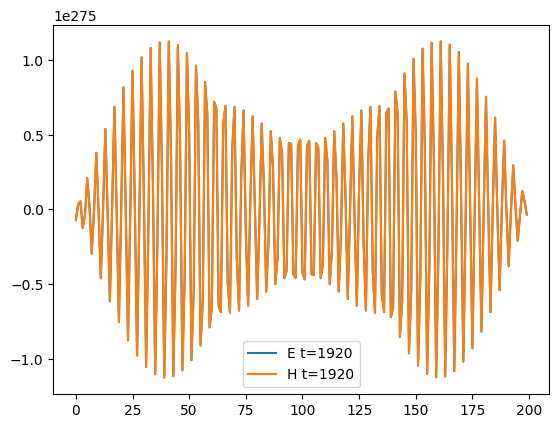

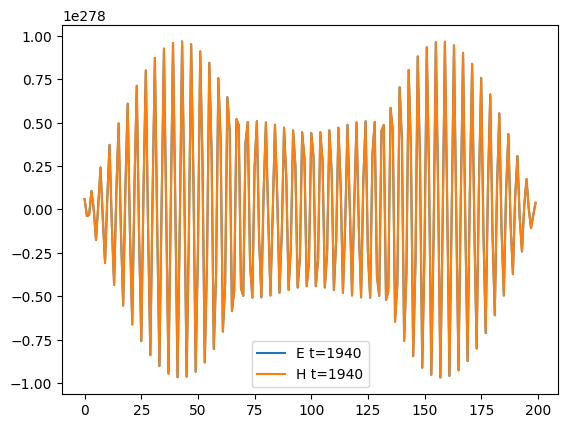

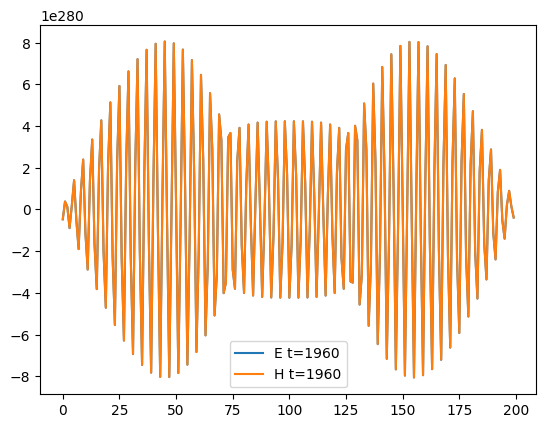

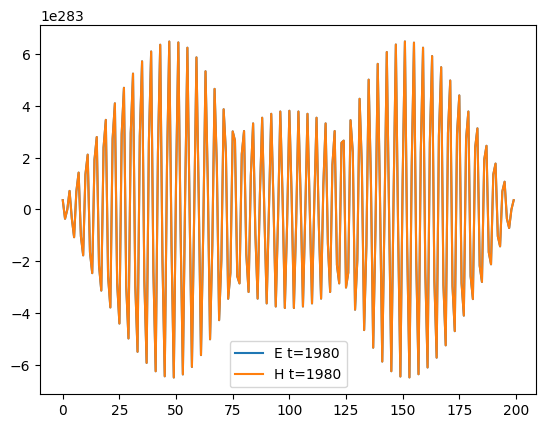

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# cargar datos
with open("../fields.dat") as f:
    raw = f.read().strip().split("\n\n")

for block in raw:
    lines = block.strip().split("\n")
    if not lines: continue
    t = lines[0].split("=")[1]
    data = np.loadtxt(lines[1:])
    z, Ex, Hy = data.T
    plt.plot(z, Ex, label=f"E t={t}")
    plt.plot(z, Hy, label=f"H t={t}")
    plt.legend()
    plt.show()


In [13]:
import os
import numpy as np
import matplotlib.pyplot as plt

C = 3.0e8

def load_blocks(path="../fields.dat"):
    """Carga datos desde ../fields.dat por defecto"""
    with open(path) as f:
        blocks = f.read().strip().split("\n\n")
    frames = []
    for block in blocks:
        lines = [ln for ln in block.strip().split("\n") if ln]
        if not lines: 
            continue
        t = int(lines[0].split("=")[1])
        data = np.loadtxt(lines[1:])
        z, Ex, Hy = data.T
        frames.append((t, z, Ex, Hy))
    return frames

def summarize(path="../fields.dat", tag="simulacion", outdir="analysis_outputs"):
    frames = load_blocks(path)
    energies, maxvals, times = [], [], []
    for (t, z, Ex, Hy) in frames:
        energies.append(np.trapz(Ex**2 + Hy**2, z))
        maxvals.append(max(np.abs(Ex).max(), np.abs(Hy).max()))
        times.append(t)

    os.makedirs(outdir, exist_ok=True)

    plt.figure()
    plt.plot(times, energies)
    plt.xlabel("t step"); plt.ylabel("∫(E^2+H^2) dz (rel.)")
    plt.title(f"Energía — {tag}")
    plt.tight_layout()
    plt.savefig(os.path.join(outdir, f"energy_{tag}.png"))
    plt.close()

    plt.figure()
    plt.plot(times, maxvals)
    plt.xlabel("t step"); plt.ylabel("max |campo|")
    plt.title(f"Amplitud máx — {tag}")
    plt.tight_layout()
    plt.savefig(os.path.join(outdir, f"max_{tag}.png"))
    plt.close()

def main():
    # Usar directamente ../fields.dat
    summarize("../fields.dat", "default_case")

    print("\nListo. Revisa la carpeta analysis_outputs/ para las gráficas de energía y amplitud.")

if __name__ == "__main__":
    main()


C:\Users\Usuario\AppData\Local\Temp\ipykernel_9152\2891717341.py:26: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  energies.append(np.trapz(Ex**2 + Hy**2, z))
C:\Users\Usuario\AppData\Local\Temp\ipykernel_9152\2891717341.py:26: RuntimeWarning: overflow encountered in square
  energies.append(np.trapz(Ex**2 + Hy**2, z))
C:\Users\Usuario\AppData\Local\Temp\ipykernel_9152\2891717341.py:26: RuntimeWarning: overflow encountered in add
  energies.append(np.trapz(Ex**2 + Hy**2, z))



Listo. Revisa la carpeta analysis_outputs/ para las gráficas de energía y amplitud.
